<a href="https://colab.research.google.com/github/ch3ngp3ng/DSE200_Python_for_Data_Analysis/blob/master/DSE230/creditcard/creditcard_pd_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
print(round(df.isFraud.sum()/len(df)*100,2),'%')

0.13 %


In [ ]:
df.isFraud.sum()

8213

In [ ]:
df.isFlaggedFraud.sum()

16

In [ ]:
df.isFraud.sum() & df.isFlaggedFraud.sum()

16

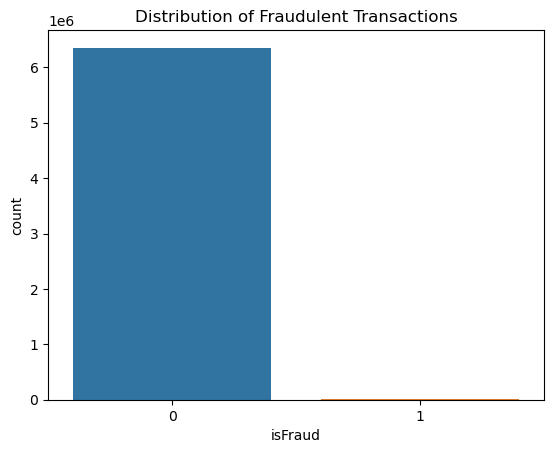

In [ ]:
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

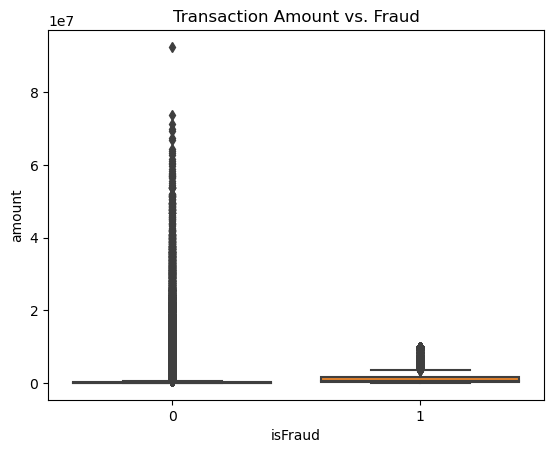

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs. Fraud')
plt.show()

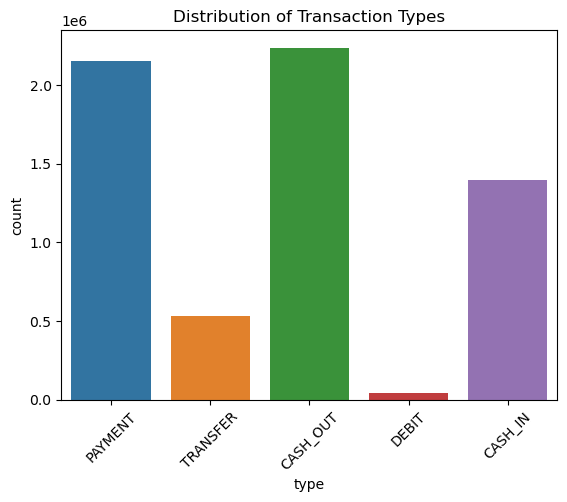

In [ ]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()

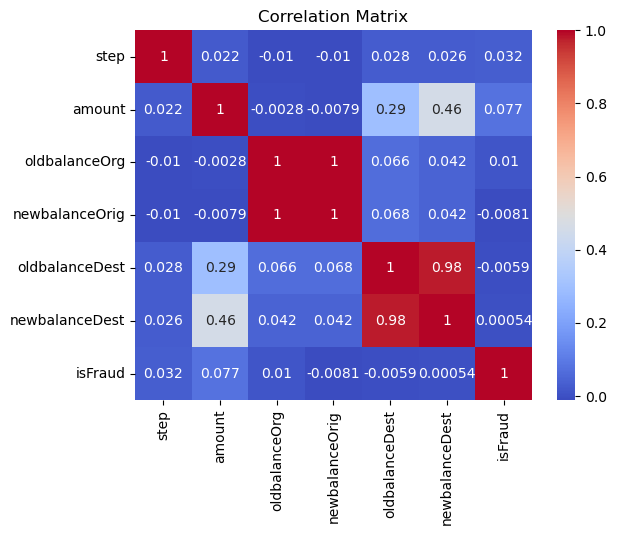

In [ ]:
corr = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

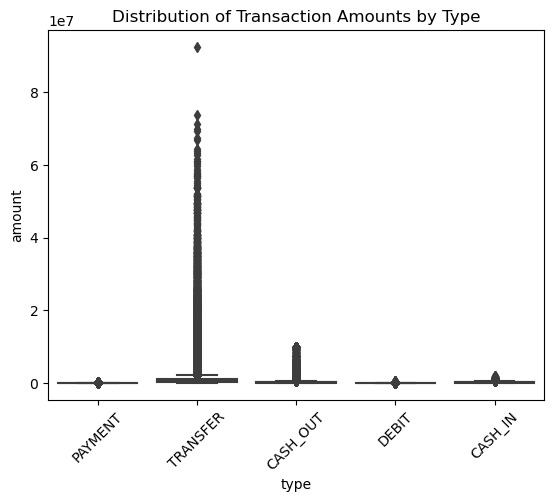

In [ ]:
sns.boxplot(x='type', y='amount', data=df)
plt.title('Distribution of Transaction Amounts by Type')
plt.xticks(rotation=45)
plt.show()

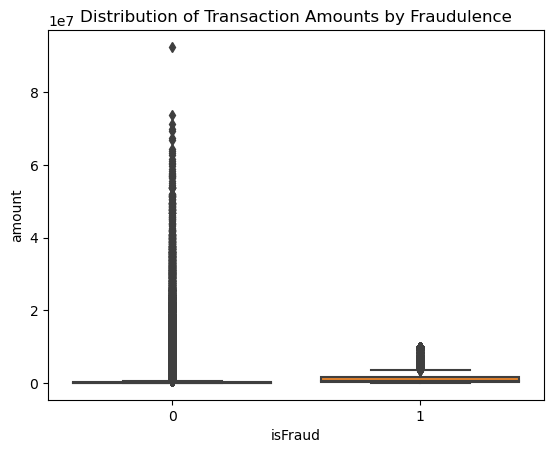

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Distribution of Transaction Amounts by Fraudulence')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df = df.drop(['step', 'nameOrig', 'nameDest'], axis=1)
df = pd.get_dummies(df, columns=['type'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('isFraud', axis=1), df['isFraud'], test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.79      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
!pip install graphviz
!conda install graphviz
from sklearn.tree import export_graphviz
import graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 406.9 kB/s eta 0:00:00a 0:00:01


In [ ]:
estimator = clf.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None, 
                feature_names=X_train.columns.tolist(),
                class_names=['not_fraud', 'fraud'], 
                filled=True, rounded=True,  
                special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render('random_forest')
graph